In [1]:
from plot_helpers import *
from helpers import *

# PCA 2 components

In [2]:
prediction_data_paths = glob.glob("predictions_pca_2/*.csv")
prediction_data_paths

['predictions_pca_2\\predictions_L10_PCA.csv',
 'predictions_pca_2\\predictions_L20_PCA.csv',
 'predictions_pca_2\\predictions_L30_PCA.csv',
 'predictions_pca_2\\predictions_L40_PCA.csv',
 'predictions_pca_2\\predictions_L50_PCA.csv',
 'predictions_pca_2\\predictions_L60_PCA.csv']

In [3]:
sizes = [10, 20, 30, 40, 50, 60]


all_data = collect_all_predictions(prediction_data_paths, system_sizes=sizes, filename="predictions_pca_2.csv")

In [4]:
all_data.head()

,Temperature,P_low,P_high,std_low,std_high,L
0,0.52,0.989494,0.010506,0.000000,0.000000,10
1,0.54,0.989494,0.010506,0.000000,0.000000,10
2,0.56,0.989494,0.010506,0.000000,0.000000,10
3,0.58,0.989488,0.010512,0.000195,0.000195,10
4,0.60,0.989488,0.010512,0.000195,0.000195,10


In [5]:
all_data.isnull().values.any()

False

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1056 non-null   float64
 1   P_low        1056 non-null   float64
 2   P_high       1056 non-null   float64
 3   std_low      1056 non-null   float64
 4   std_high     1056 non-null   float64
 5   L            1056 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 45.5 KB


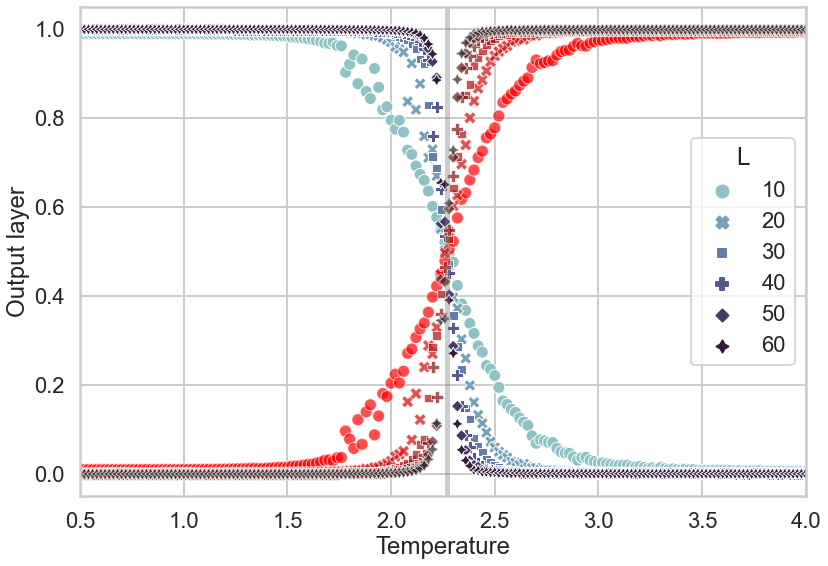

In [7]:
plot_predictions(all_data, filename="predictions_PCA_2.svg")

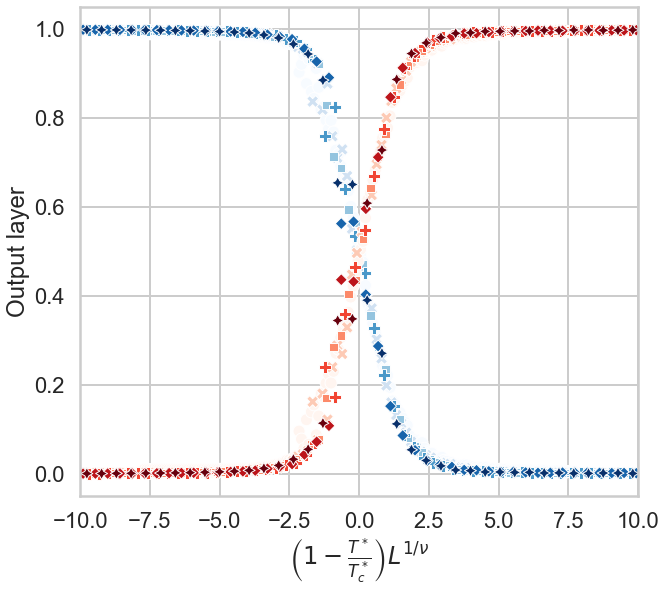

In [8]:
plot_collapsed_predictions(all_data, filename="collapsed_predictions_PCA_2.svg", figsize=(10,9))

In [9]:
intersections=determine_crossing_points(all_data, append_zero_value=True, system_sizes=sizes)

intercepts for L=10: [2.27592571]
intercepts for L=20: [2.26119757]
intercepts for L=30: [2.2738919]
intercepts for L=40: [2.26831366]
intercepts for L=50: [2.26823958]
intercepts for L=60: [2.27161483]


In [10]:
intersections.head()

,inv_L,Tc
0,0.000000,2.269185
6,0.016667,2.271615
5,0.020000,2.268240
4,0.025000,2.268314
3,0.033333,2.273892


In [11]:
# intersections.to_csv("linear_data_pca_2.csv")
intersections = pd.read_csv("linear_data_pca_2.csv", index_col=0)
intersections

,inv_L,Tc
0,0.000000,2.269185
6,0.016667,2.271615
5,0.020000,2.268240
4,0.025000,2.268314
3,0.033333,2.273892
2,0.050000,2.266198
1,0.100000,2.275926


In [12]:
(xfit, yfit) = fit_linregress(intersections.inv_L, intersections.Tc, return_stats=False, expand=True, x_factor=0.3, y_factor=1.3)

slope =  0.05739597953673923
intercept =  2.2684723619947387
R =  0.5373793392986662
p =  0.21351880354816688
Standard error =  0.04028269678103057


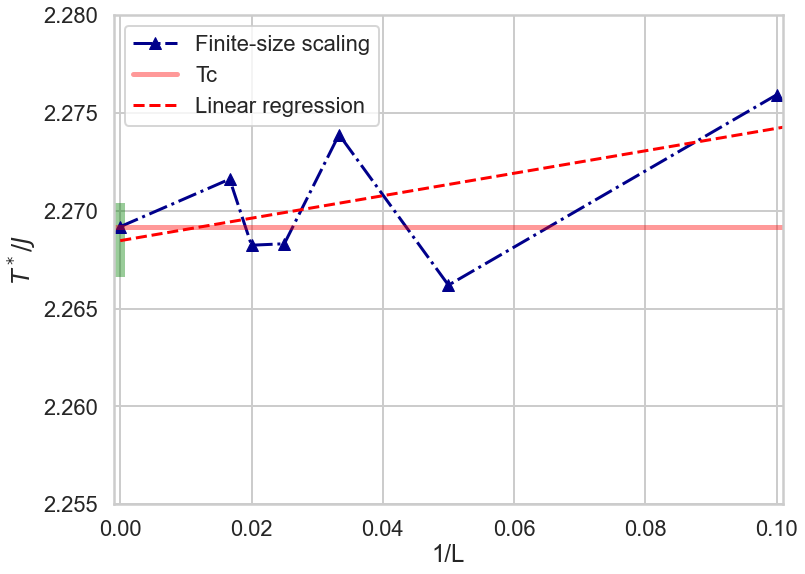

In [13]:
def plot_finite_size_scaling(intersect_data, plot_critic=True, fit_line=True, lin_regress_data=None, show_errorbars=True, errorbars=None, figsize=(12,9), filename="scaling2_results.svg"):
    Tc = 2/np.log(1+np.sqrt(2))
    fig, ax = plt.subplots(figsize=figsize)
    if not show_errorbars:
        ax.plot(intersect_data["inv_L"], intersect_data["Tc"], "-.^", color="darkblue", label="Finite-size scaling")
    else:
        if not errorbars:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=np.std(intersect_data["Tc"]),
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling")
        else:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=errorbars,
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling result")
    if plot_critic:
        ax.axhline(y=Tc, xmin=0, xmax=1, color='red', linewidth=5, alpha=0.4, label="Tc")
    
    if fit_line and lin_regress_data:
        x_extended, y_fit = lin_regress_data
        ax.plot(x_extended, y_fit, "--r", label="Linear regression")
    
    ax.errorbar(0, 2.2685, yerr=0.0019, elinewidth=10, ecolor="green", alpha=0.4)
    ax.set_ylabel(r"$T^*/J$")
    ax.set_xlabel("1/L")
    ax.set_xlim([-0.001, 0.101])
    ax.set_ylim([2.255, 2.28])
    ax.legend()
    if filename:
        fig.savefig(filename, bbox_inches='tight')


        
plot_finite_size_scaling(intersections, lin_regress_data=(xfit, yfit), show_errorbars=False, filename="scaling_results_pca_2.svg")

In [2]:
import glob

projections_ = glob.glob("projections_pca_2/*")
projections_

['projections_pca_2\\projections_L10.csv',
 'projections_pca_2\\projections_L20.csv',
 'projections_pca_2\\projections_L30.csv',
 'projections_pca_2\\projections_L40.csv',
 'projections_pca_2\\projections_L50.csv',
 'projections_pca_2\\projections_L60.csv']

In [3]:
datas1 = []
datas2 = []

for i,f in enumerate(projections_):
    data = pd.read_csv(f, index_col=0)
    if i<3:
        datas1.append(data)
    else:
        datas2.append(data)
        
datas = [datas1, datas2]

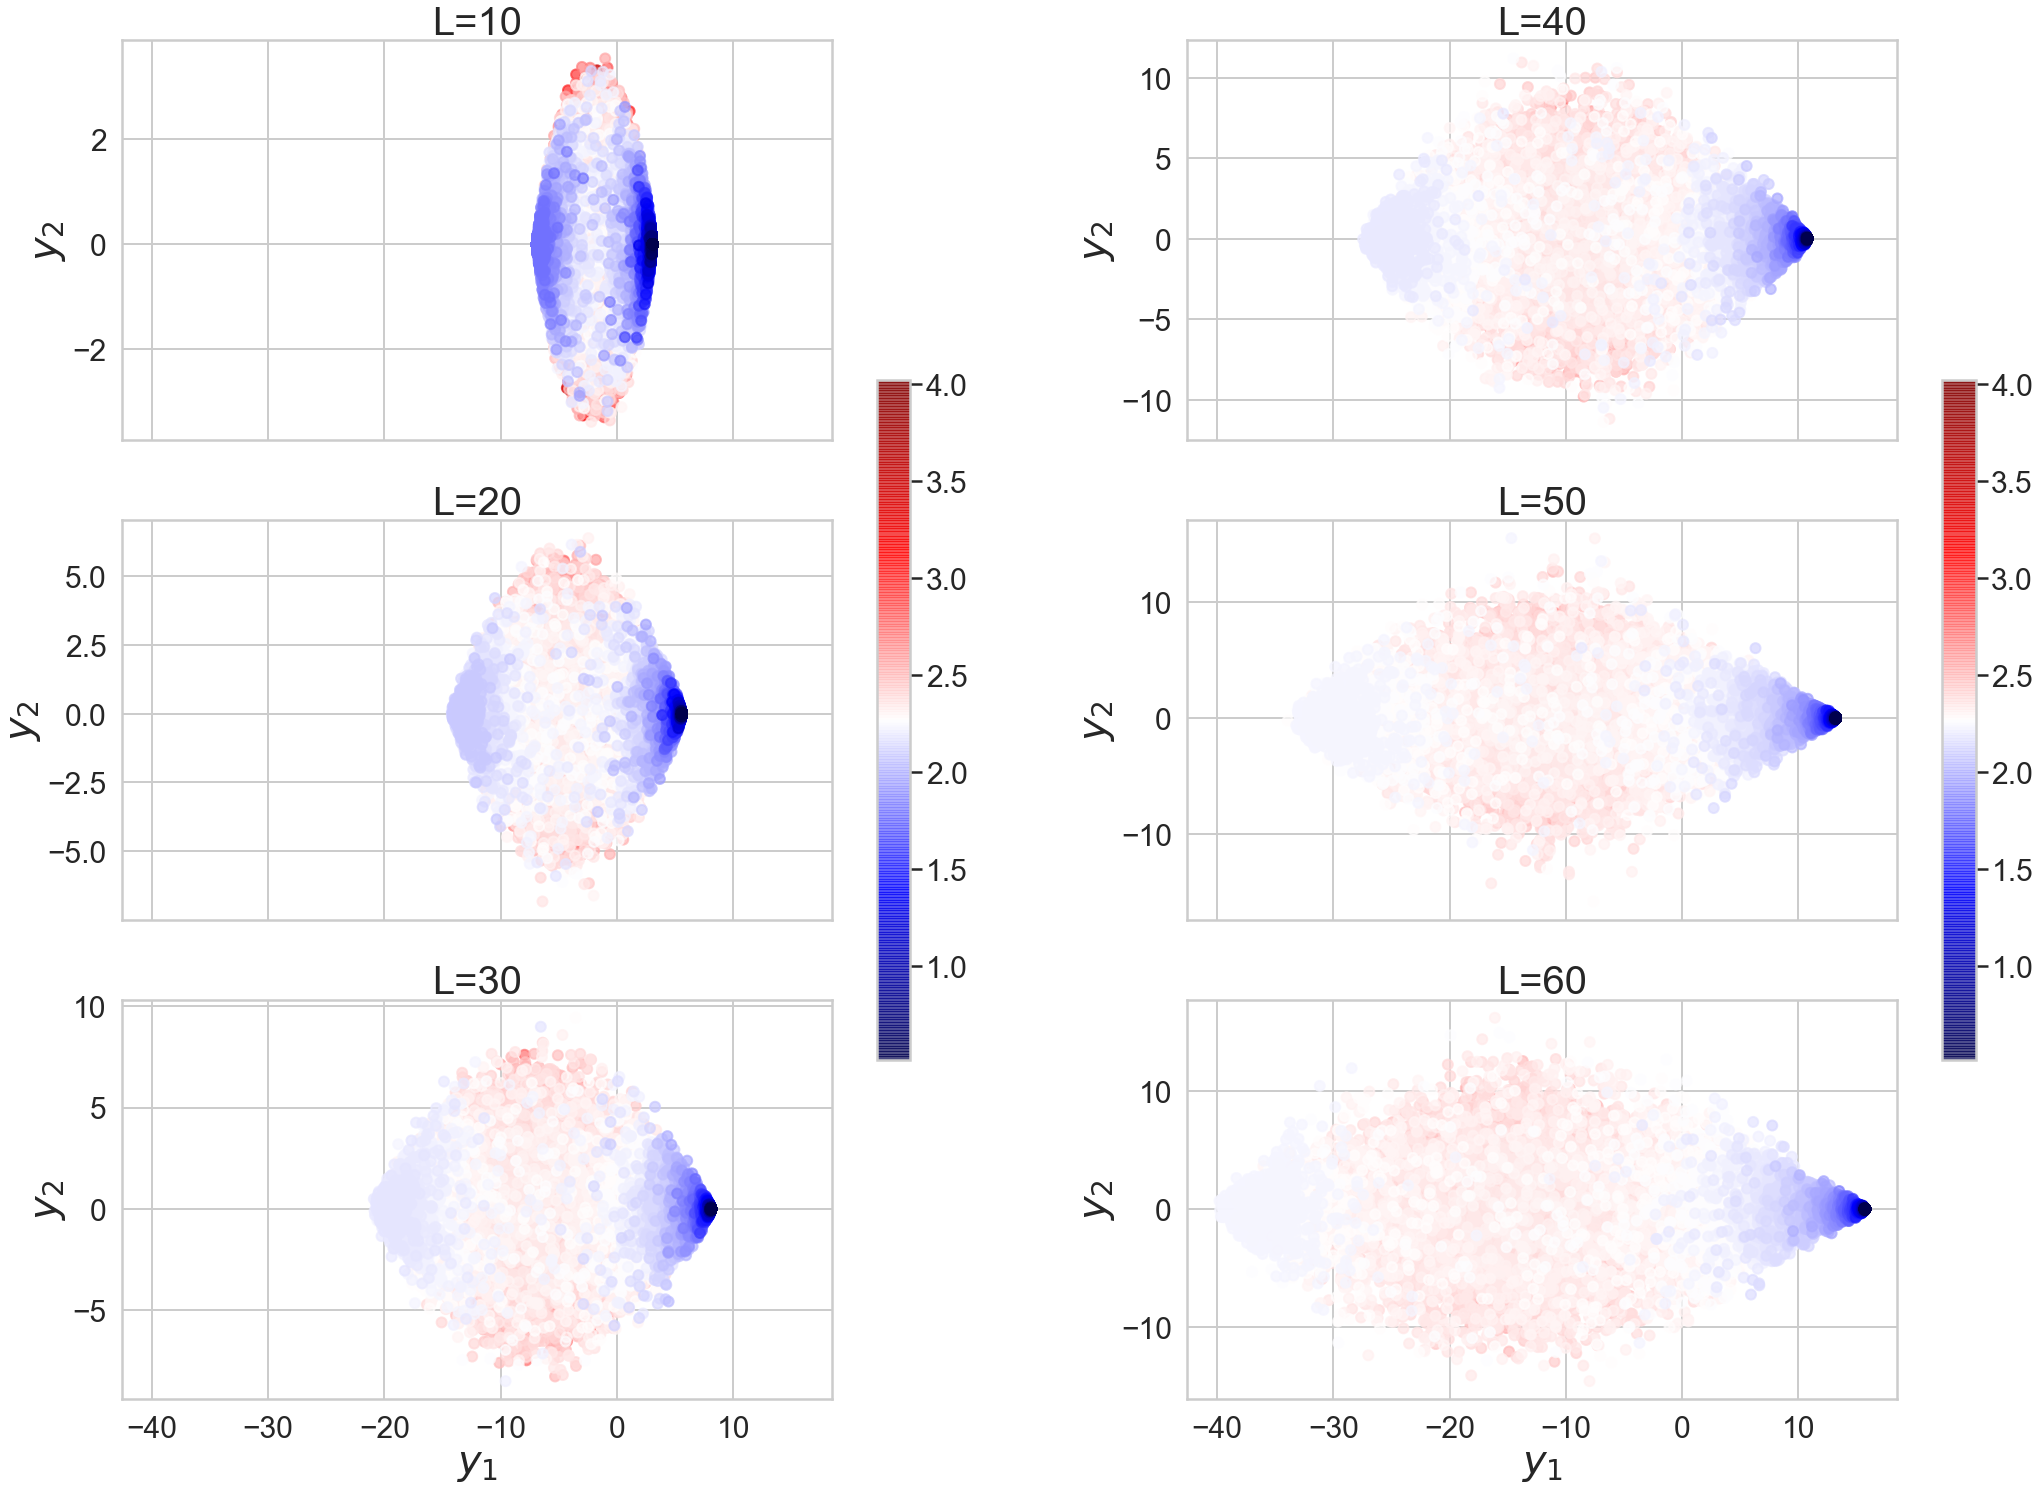

In [13]:
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

fig, ax = plt.subplots(3,2, figsize=(35,25), sharex=True)
labels = [["L=10", "L=20", "L=30"], ["L=40", "L=50", "L=60"]]

# classes = [0 if t<2.26 else 1 for t in datas[0][0]["Temperature"]]
classes = datas[0][0]["Temperature"]


for i in range(3):
    for j in range(2):
        pcm = ax[i,j].scatter(x=datas[j][i]["1st component"], y=datas[j][i]["2nd component"], s=100, c=classes, cmap="seismic", alpha=0.7)
        ax[i,j].set_ylabel(r"$y_2$", size=40)
        ax[2,j].set_xlabel(r"$y_1$", size=40)
        ax[i,j].set_title(labels[j][i], size=40)
fig.colorbar(pcm, ax=ax[:,0], shrink=0.5)
fig.colorbar(pcm, ax=ax[:,1], shrink=0.5)
# fig.savefig("all_projections_subplot_pca2_2_clases.png", bbox_inches="tight")

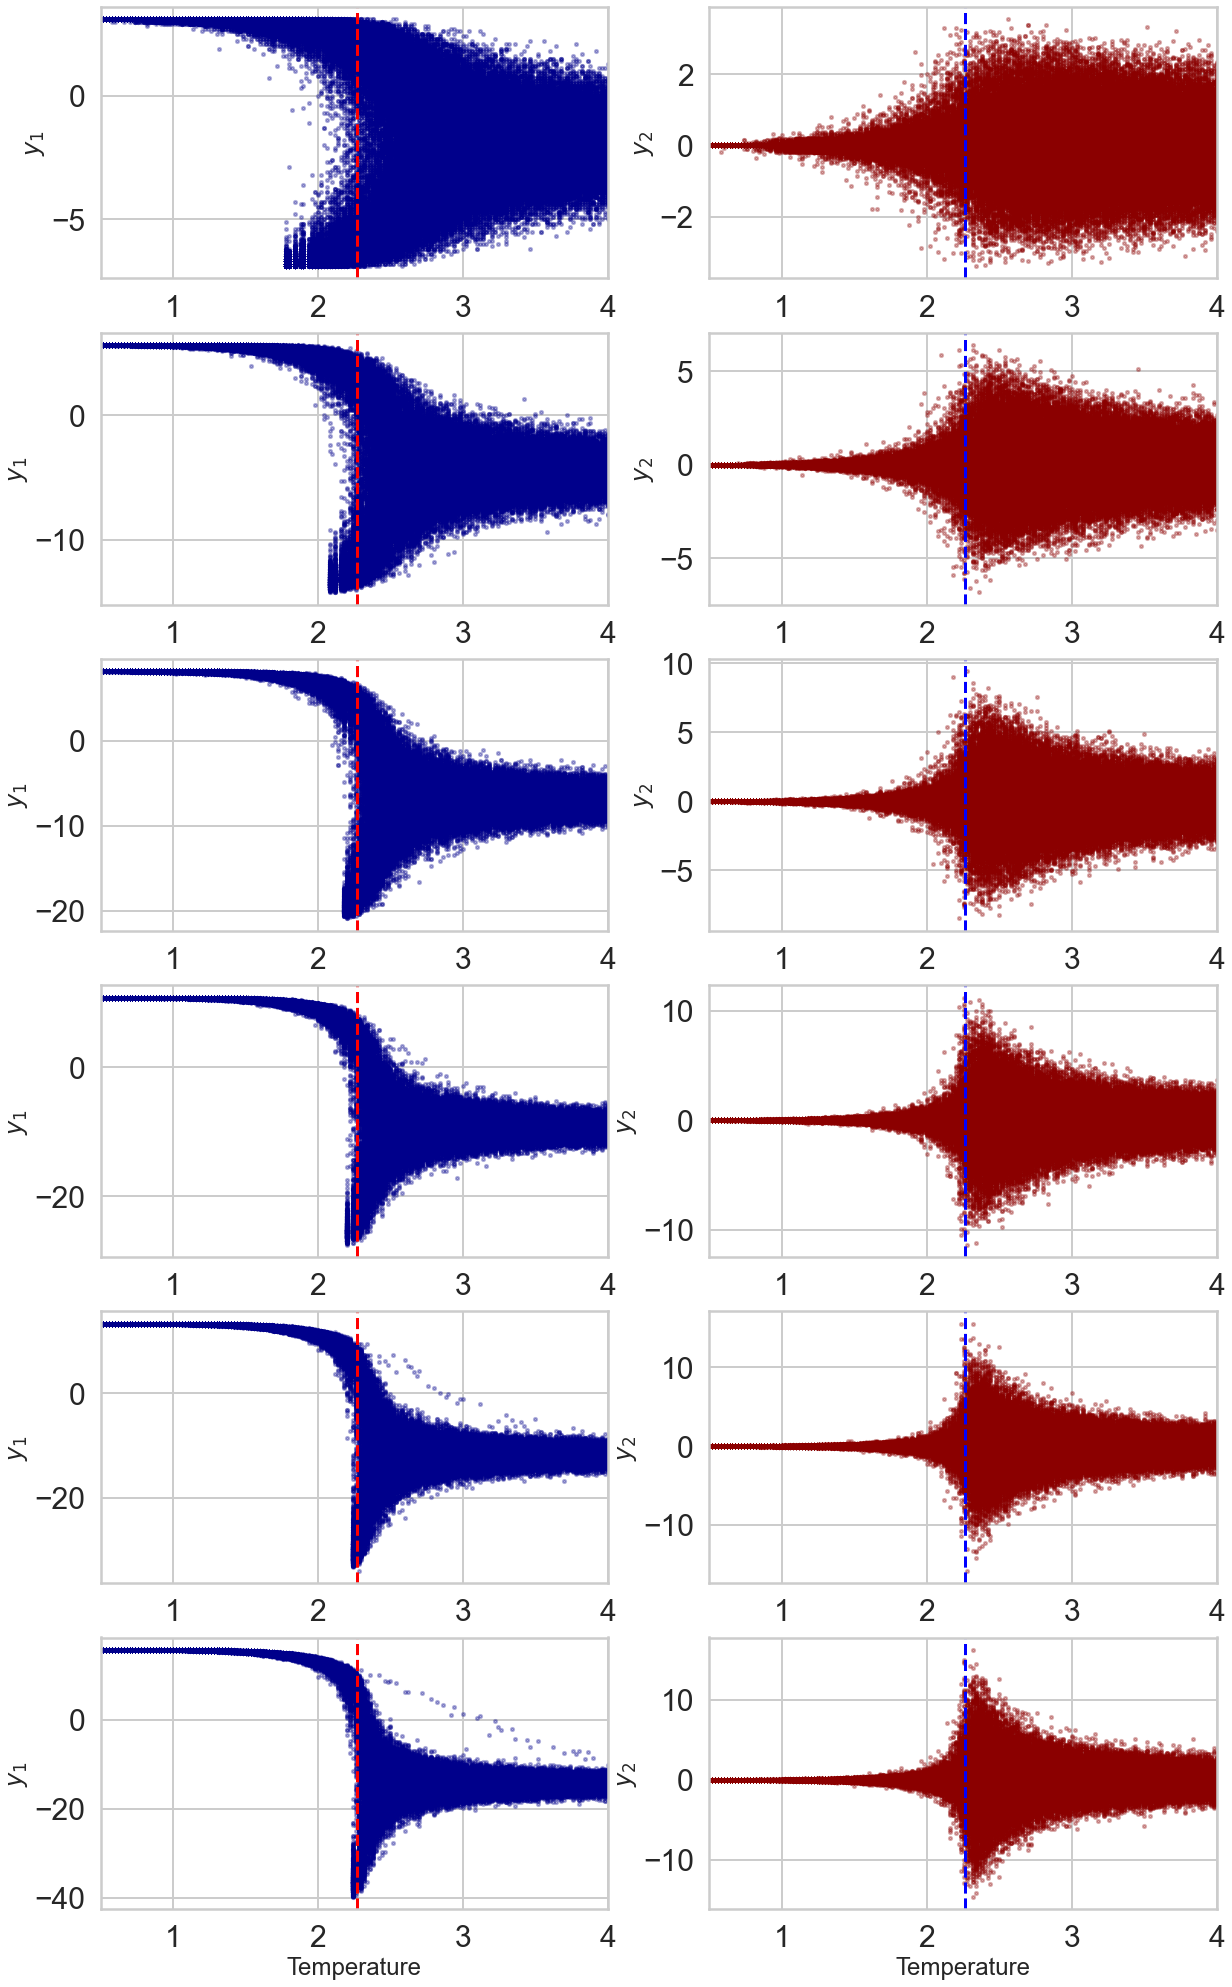

In [14]:
datas = []
for i,f in enumerate(projections_):
    data = pd.read_csv(f, index_col=0)
    datas.append(data) 


fig, ax = plt.subplots(3,2, figsize=(20,18))
labels = ["L=10", "L=20", "L=30", "L=40", "L=50", "L=60"]
for i,df in enumerate(datas):
    ax[i,0].scatter(x=df["Temperature"], y=df["1st component"], label=labels[i], s=10, alpha=0.3, color="darkblue")
    ax[i,0].set_ylabel(r"$y_1$")
    ax[5,0].set_xlabel("Temperature")
    ax[i,0].set_xlim([0.5, 4.0])
    ax[i,1].scatter(x=df["Temperature"], y=df["2nd component"], label=labels[i], s=10, alpha=0.3, color="darkred")
    ax[i,1].set_ylabel(r"$y_2$")
    ax[5,1].set_xlabel("Temperature")
    ax[i,1].set_xlim([0.5, 4.0])
    ax[i,1].axvline(2.2669, linestyle="--", color="blue")
    ax[i,0].axvline(2.2669, linestyle="--", color="red")
fig.savefig("all_projections_on_T_subplot.png", bbox_inches="tight")

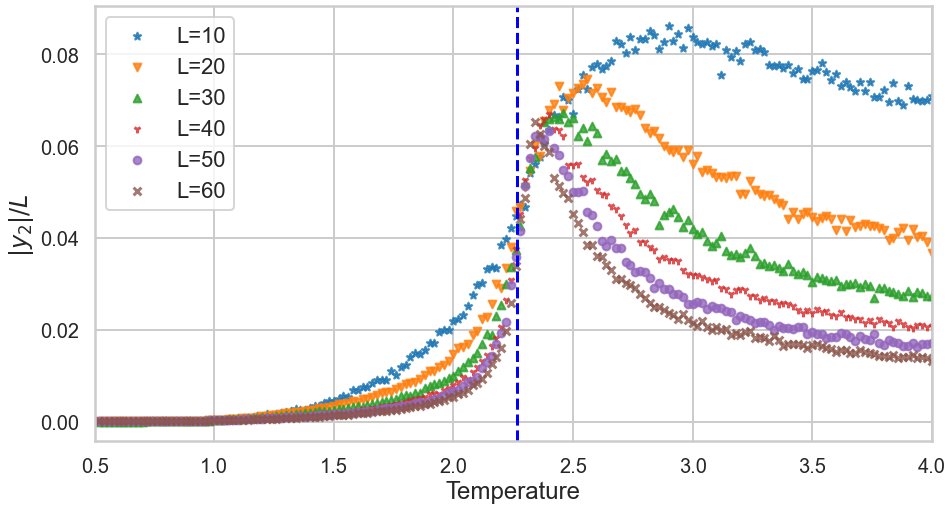

In [15]:
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

labels1D = ["L=10", "L=20", "L=30", "L=40", "L=50", "L=60"]
markers = ["*", "v", "^", "1", "o", "x"]
LL = [10, 20, 30, 40, 50, 60]

fig, ax = plt.subplots(figsize=(15,8))
for i,data in enumerate(datas):
    data["abs_y1"] = np.abs(data["1st component"])
    data["abs_y2"] = np.abs(data["2nd component"])
    data_mean = data.groupby("Temperature").mean()
    ax.scatter(x=data_mean.index, y=data_mean["abs_y2"]/LL[i], alpha=0.8, s=60, label=labels1D[i], marker=markers[i])
    
    
ax.axvline(2.2669, linestyle="--", color="blue")
ax.set_xlabel("Temperature")
ax.set_ylabel(r"$|y_2|/L$")
ax.set_xlim([0.5, 4.0])
ax.legend()
# fig.savefig("avg_2nd_component_on_Temp_all.svg", bbox_inches="tight")
plt.show()

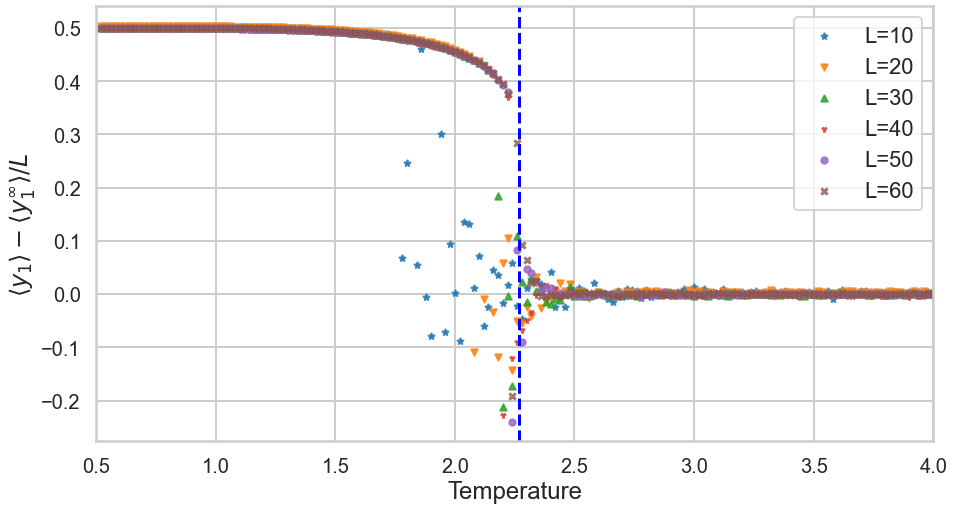

In [45]:
labels1D = ["L=10", "L=20", "L=30", "L=40", "L=50", "L=60"]

fig, ax = plt.subplots(figsize=(15,8))
for i,data in enumerate(datas):
    data["abs_y1"] = np.abs(data["1st component"])
    data_mean = data.groupby("Temperature").mean()
    ax.scatter(data_mean.index, (data_mean["1st component"]-data_mean["1st component"].iloc[-1])/LL[i], alpha=0.8, s=40, label=labels1D[i], marker=markers[i])
    
    
ax.axvline(2.2669, linestyle="--", color="blue")
ax.set_xlabel("Temperature")
ax.set_ylabel(r"$\langle y_1 \rangle - \langle y_1^{\infty} \rangle/L$")
ax.legend()
ax.set_xlim([0.5, 4.0])
# fig.savefig("avg_1st_component_on_Temp_all.svg", bbox_inches="tight")
plt.show()

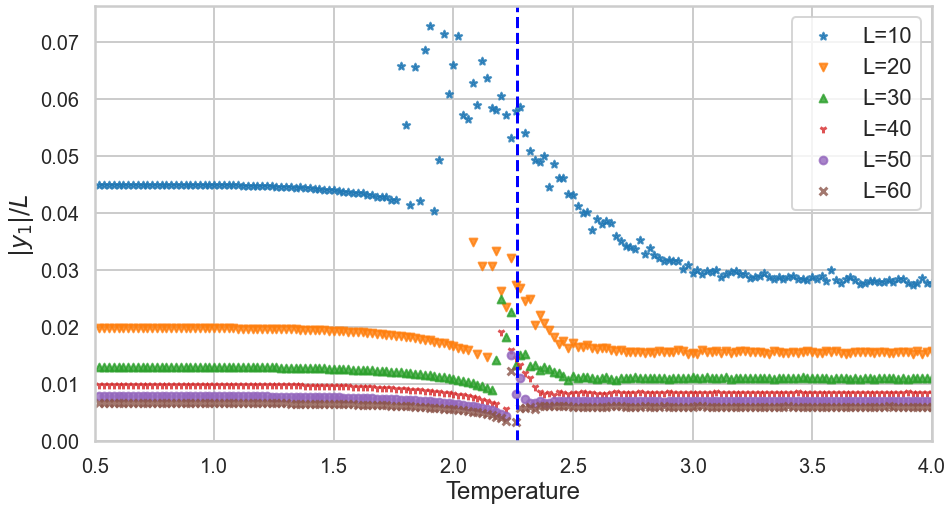

In [49]:
# scaling
pc1_scaler = MinMaxScaler()


labels1D = ["L=10", "L=20", "L=30", "L=40", "L=50", "L=60"]

fig, ax = plt.subplots(figsize=(15,8))
for i,data in enumerate(datas):
    data["abs_y1"] = np.abs(data["1st component"])
    data["scaled_y1"] = pc1_scaler.fit_transform(data[["1st component", "abs_y1"]])[:,1]
    data_mean = data.groupby("Temperature").mean()
    
    ax.scatter(data_mean.index, (data_mean["scaled_y1"])/LL[i], alpha=0.8, s=60, label=labels1D[i], marker=markers[i])
    
    
ax.axvline(2.2669, linestyle="--", color="blue")
ax.set_xlabel("Temperature")
ax.set_ylabel(r"$|y_1|/L$")
ax.legend()
ax.set_xlim([0.5, 4.0])
# fig.savefig("avg_1st_component_on_Temp_all.svg", bbox_inches="tight")
plt.show()

In [41]:
data_mean

,1st component,2nd component,abs_y1,abs_y2
Temperature,,,,
0.52,15.747103,-0.002879,15.747103,0.002879
0.54,15.747070,-0.002850,15.747070,0.002855
0.56,15.747003,-0.002768,15.747003,0.002889
0.58,15.747087,-0.002861,15.747087,0.002861
0.60,15.746920,-0.002846,15.746920,0.002940
...,...,...,...,...
3.94,-14.270384,0.021636,14.270384,0.834066
3.96,-14.254337,0.036366,14.254337,0.839248
3.98,-14.211176,0.023605,14.211176,0.826208


# PCA --> 50% variance

In [23]:
prediction_data_paths2 = glob.glob("predictions_pca_100/*.csv")
prediction_data_paths2

['predictions_pca_100\\predictions_L10_PCA20.csv',
 'predictions_pca_100\\predictions_L20_PCA50.csv',
 'predictions_pca_100\\predictions_L30_PCA100.csv',
 'predictions_pca_100\\predictions_L40_PCA177.csv',
 'predictions_pca_100\\predictions_L50_PCA286.csv',
 'predictions_pca_100\\predictions_L60_PCA460.csv']

In [24]:
all_data2 = collect_all_predictions(prediction_data_paths2, system_sizes=sizes, filename="predictions_pca_100.csv")
all_data2

,Temperature,P_low,P_high,std_low,std_high,L
0,0.52,0.990239,0.009761,0.000000,0.000000,10
1,0.54,0.990239,0.009761,0.000000,0.000000,10
2,0.56,0.990239,0.009761,0.000000,0.000000,10
3,0.58,0.990239,0.009761,0.000000,0.000000,10
4,0.60,0.990239,0.009761,0.000000,0.000000,10
...,...,...,...,...,...,...
1051,3.94,0.001401,0.998599,0.000338,0.000338,60
1052,3.96,0.001393,0.998607,0.000348,0.000348,60
1053,3.98,0.001394,0.998606,0.000340,0.000340,60
1054,4.00,0.001379,0.998621,0.000280,0.000280,60


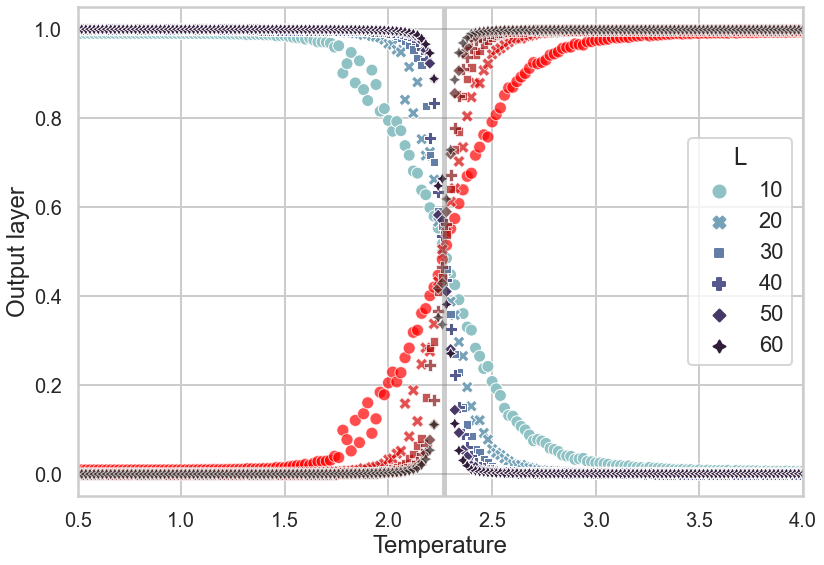

In [25]:
plot_predictions(all_data2, filename="predictions_PCA_100.svg")

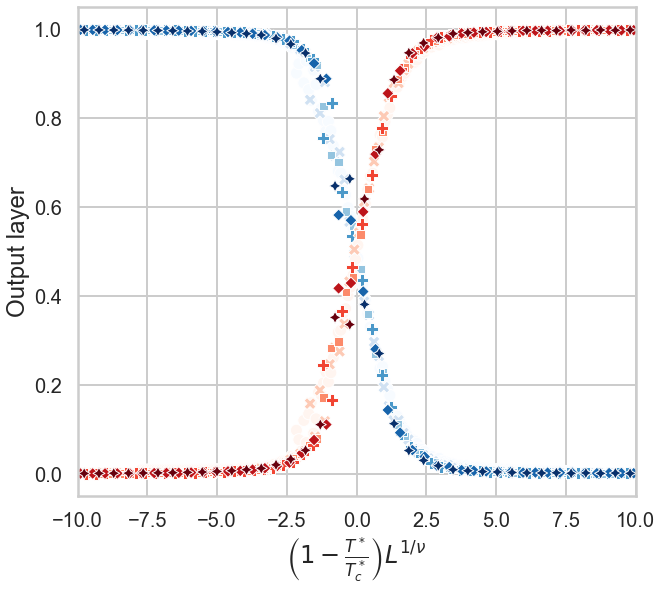

In [26]:
plot_collapsed_predictions(all_data2, filename="collapsed_predictions_PCA_100.svg", figsize=(10,9))

In [27]:
intersections2=determine_crossing_points(all_data2, append_zero_value=True, system_sizes=sizes)

intercepts for L=10: [2.27089003]
intercepts for L=20: [2.25865777]
intercepts for L=30: [2.27199721]
intercepts for L=40: [2.26707779]
intercepts for L=50: [2.26880897]
intercepts for L=60: [2.27160252]


In [38]:
# intersections2.to_csv("linear_data_pca_100.csv")

intersections2 = pd.read_csv("linear_data_pca_100.csv", index_col=0)
intersections2

,inv_L,Tc
0,0.000000,2.269185
6,0.016667,2.271603
5,0.020000,2.268809
4,0.025000,2.267078
3,0.033333,2.271997
2,0.050000,2.260658
1,0.100000,2.270890


In [39]:
(xfit, yfit) = fit_linregress(intersections2.inv_L, intersections2.Tc, return_stats=False, expand=True, x_factor=0.3, y_factor=1.3)

slope =  -0.006213734546761539
intercept =  2.2688202783858507
R =  -0.05169545890642008
p =  0.9123562832884713
Standard error =  0.05368268302088365


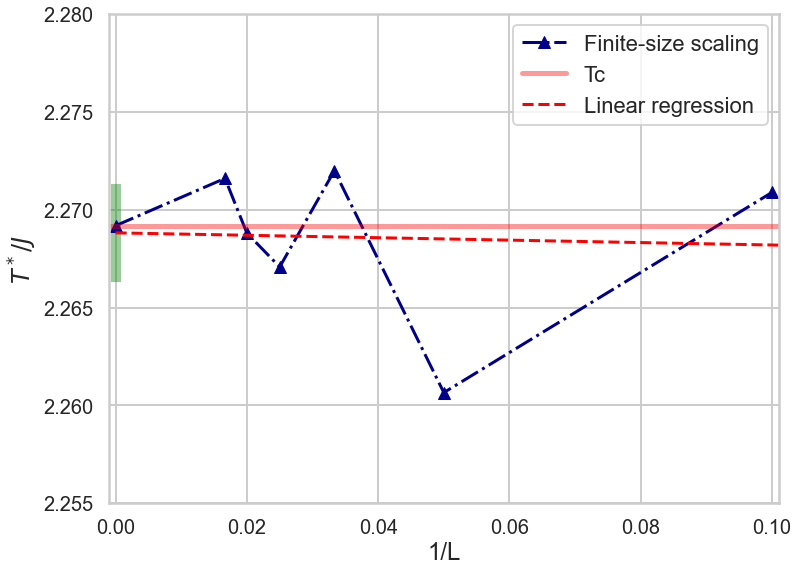

In [42]:
def plot_finite_size_scaling(intersect_data, plot_critic=True, fit_line=True, lin_regress_data=None, show_errorbars=True, errorbars=None, figsize=(12,9), filename="scaling2_results.svg"):
    Tc = 2/np.log(1+np.sqrt(2))
    fig, ax = plt.subplots(figsize=figsize)
    if not show_errorbars:
        ax.plot(intersect_data["inv_L"], intersect_data["Tc"], "-.^", color="darkblue", label="Finite-size scaling")
    else:
        if not errorbars:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=np.std(intersect_data["Tc"]),
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling")
        else:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=errorbars,
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling result")
    if plot_critic:
        ax.axhline(y=Tc, xmin=0, xmax=1, color='red', linewidth=5, alpha=0.4, label="Tc")
    
    if fit_line and lin_regress_data:
        x_extended, y_fit = lin_regress_data
        ax.plot(x_extended, y_fit, "--r", label="Linear regression")
    
    ax.errorbar(0, 2.26882, yerr=0.0025, elinewidth=10, ecolor="green", alpha=0.4)
    ax.set_ylabel(r"$T^*/J$")
    ax.set_xlabel("1/L")
    ax.set_xlim([-0.001, 0.101])
    ax.set_ylim([2.255, 2.28])
    ax.legend()
    if filename:
        fig.savefig(filename, bbox_inches='tight')


        
plot_finite_size_scaling(intersections2, lin_regress_data=(xfit, yfit), show_errorbars=False, filename="scaling_results_pca_100.svg")

# PCA 75%

In [43]:
prediction_data_paths3 = glob.glob("predictions_pca_600/*.csv")
prediction_data_paths3

['predictions_pca_600\\predictions_L10_PCA70.csv',
 'predictions_pca_600\\predictions_L20_PCA250.csv',
 'predictions_pca_600\\predictions_L30_PCA600.csv',
 'predictions_pca_600\\predictions_L40_PCA800.csv',
 'predictions_pca_600\\predictions_L50_PCA1031.csv',
 'predictions_pca_600\\predictions_L60_PCA1500.csv']

In [44]:
all_data3 = collect_all_predictions(prediction_data_paths3, system_sizes=sizes, filename="predictions_pca_600.csv")
all_data3

,Temperature,P_low,P_high,std_low,std_high,L
0,0.52,0.988273,0.011727,0.000000,0.000000,10
1,0.54,0.988273,0.011727,0.000000,0.000000,10
2,0.56,0.988273,0.011727,0.000000,0.000000,10
3,0.58,0.988273,0.011727,0.000000,0.000000,10
4,0.60,0.988273,0.011727,0.000000,0.000000,10
...,...,...,...,...,...,...
1051,3.94,0.001109,0.998891,0.000278,0.000278,60
1052,3.96,0.001107,0.998893,0.000265,0.000265,60
1053,3.98,0.001102,0.998898,0.000260,0.000260,60
1054,4.00,0.001092,0.998908,0.000240,0.000240,60


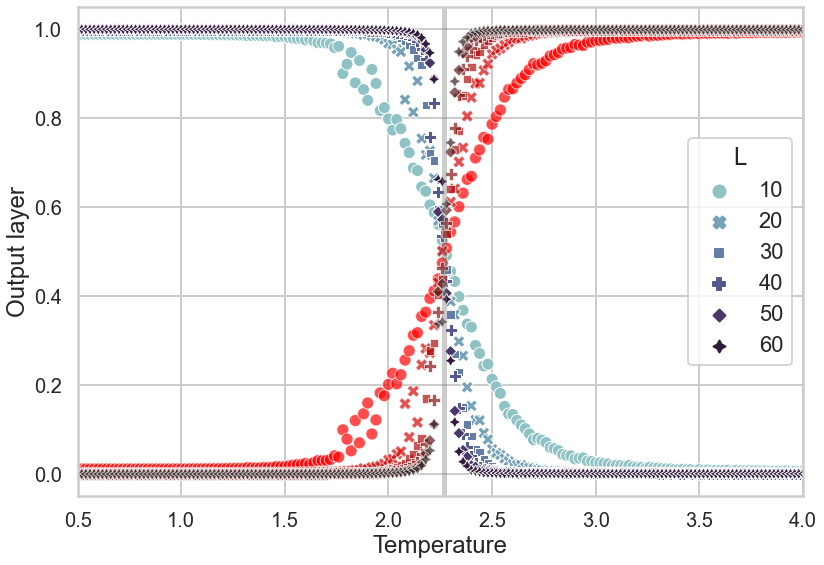

In [45]:
plot_predictions(all_data3, filename="predictions_PCA_600.svg")

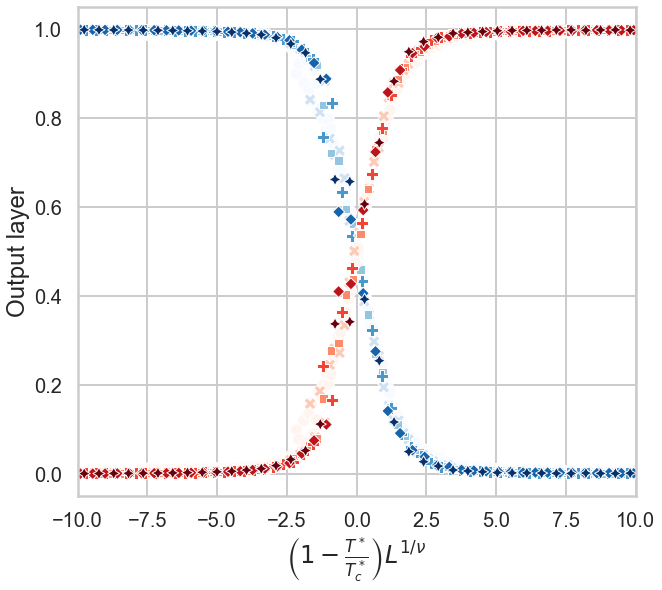

In [47]:
plot_collapsed_predictions(all_data3, filename="collapsed_predictions_PCA_600.svg", figsize=(10,9))

In [48]:
intersections3=determine_crossing_points(all_data3, append_zero_value=True, system_sizes=sizes)

intercepts for L=10: [2.27519076]
intercepts for L=20: [2.25955581]
intercepts for L=30: [2.27212042]
intercepts for L=40: [2.2671252]
intercepts for L=50: [2.26873195]
intercepts for L=60: [2.27191368]


In [49]:
# intersections3.to_csv("linear_data_pca_600.csv")

intersections3 = pd.read_csv("linear_data_pca_600.csv", index_col=0)
intersections3

,inv_L,Tc
0,0.000000,2.269185
6,0.016667,2.271914
5,0.020000,2.268732
4,0.025000,2.267125
3,0.033333,2.272120
2,0.050000,2.265758
1,0.100000,2.275191


In [50]:
(xfit3, yfit3) = fit_linregress(intersections3.inv_L, intersections3.Tc, return_stats=False, expand=True, x_factor=0.3, y_factor=1.3)

slope =  0.04913077870772536
intercept =  2.268284048836916
R =  0.49036674600664276
p =  0.26389406225045176
Standard error =  0.03905018444043414


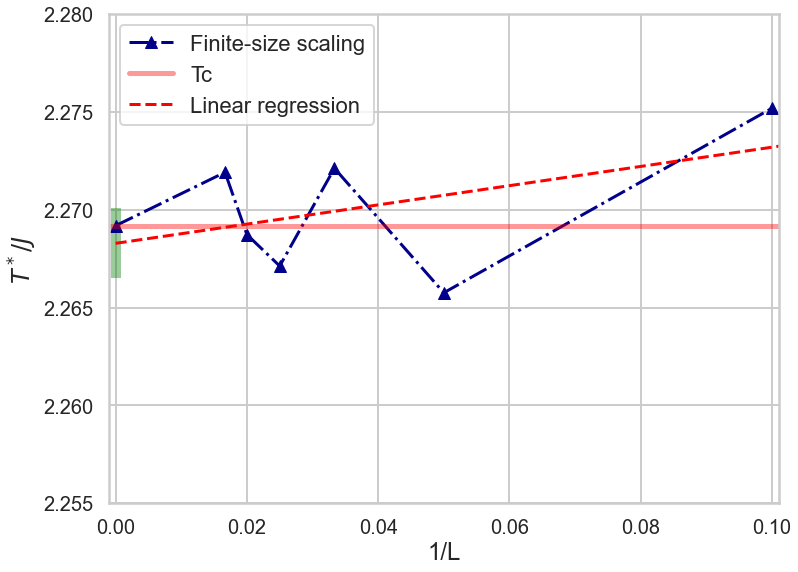

In [53]:
def plot_finite_size_scaling(intersect_data, plot_critic=True, fit_line=True, lin_regress_data=None, show_errorbars=True, errorbars=None, figsize=(12,9), filename="scaling2_results.svg"):
    Tc = 2/np.log(1+np.sqrt(2))
    fig, ax = plt.subplots(figsize=figsize)
    if not show_errorbars:
        ax.plot(intersect_data["inv_L"], intersect_data["Tc"], "-.^", color="darkblue", label="Finite-size scaling")
    else:
        if not errorbars:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=np.std(intersect_data["Tc"]),
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling")
        else:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=errorbars,
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling result")
    if plot_critic:
        ax.axhline(y=Tc, xmin=0, xmax=1, color='red', linewidth=5, alpha=0.4, label="Tc")
    
    if fit_line and lin_regress_data:
        x_extended, y_fit = lin_regress_data
        ax.plot(x_extended, y_fit, "--r", label="Linear regression")
    
    ax.errorbar(0, 2.2683, yerr=0.0018, elinewidth=10, ecolor="green", alpha=0.4)
    ax.set_ylabel(r"$T^*/J$")
    ax.set_xlabel("1/L")
    ax.set_xlim([-0.001, 0.101])
    ax.set_ylim([2.255, 2.28])
    ax.legend()
    if filename:
        fig.savefig(filename, bbox_inches='tight')


        
plot_finite_size_scaling(intersections3, lin_regress_data=(xfit3, yfit3), show_errorbars=False, filename="scaling_results_pca_600.svg")